# 3) Pytorch, SVMs, Neural Networks and CNNs (15 Points)

## Exercise 1: Support Vector Machines (5 Points)

TRAINING IMAGES
Looking in './images/db/train/cars/*.jpg'


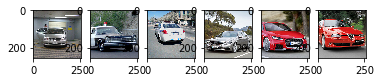

6 images found!
--------------------------------------------------------
Looking in './images/db/train/faces/*.jpg'


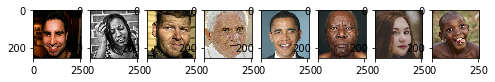

8 images found!
--------------------------------------------------------
Looking in './images/db/train/flowers/*.jpg'


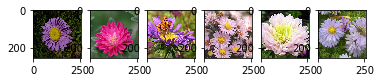

6 images found!
--------------------------------------------------------
TEST IMAGES
Looking in './images/db/test/car.jpg'


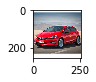

1 images found!
--------------------------------------------------------
Looking in './images/db/test/face.jpg'


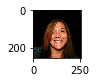

1 images found!
--------------------------------------------------------
Looking in './images/db/test/flower.jpg'


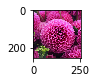

1 images found!
--------------------------------------------------------
PREDICTIONS
Expected 	     | Predicted
[1 2 3]  	     |  [1 2 3]
--------------------------------------------------------
Expected: CAR        | Predicted: CAR
Expected: FACE       | Predicted: FACE
Expected: FLOWER     | Predicted: FLOWER

DONE!


In [97]:
import numpy as np
import cv2
import glob
from sklearn import svm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

############################################################
#
#              Support Vector Machine
#              Image Classification
#
############################################################

def create_keypoints(w, h):
    keypoints = []
    keypointSize = 11
    # YOUR CODE HERE
    grid_size = 16
    kp = []
    for y in range(grid_size-1):
        for x in range(grid_size-1):             
            keypoints.append(cv2.KeyPoint((y+1)*w//grid_size,\
                                   (x+1)*h//grid_size,\
                                   keypointSize))                    
    #keypoints.append(np.array(kp))
    return keypoints

def get_image_descriptors_and_label_from_path(path, label, keypoints):
    print("Looking in '%s'" % path)
    db_image_paths = glob.glob(path)
    
    db_images = [cv2.imread(p, 1) for p in db_image_paths]
    db_grays = [cv2.cvtColor(db_image, cv2.COLOR_BGR2GRAY) for db_image in db_images]
    
    db_descriptors = []
    sift = cv2.xfeatures2d.SIFT_create()
    [db_descriptors.append(sift.compute(db_gray,keypoints)[1].flatten())for db_gray in db_grays]
    X = np.array(db_descriptors)
    
    y = np.full((1,X.shape[0]), label)
    
    fig = plt.figure(figsize=(8, 8))
    for pos, img in enumerate(db_images):
        fig.add_subplot(1, 8, (pos+1))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    print(len(db_image_paths),"images found!")
    print("--------------------------------------------------------")
    return X, y

# 1. Implement a SIFT feature extraction for a set of training images ./images/db/train/** (see 2.3 image retrieval)
# use 256x256 keypoints on each image with subwindow of 15x15px

# 2. each descriptor (set of features) need to be flattened in one vector
# That means you need a X_train matrix containing a shape of (num_train_images, num_keypoints*num_entry_per_keypoint)
# num_entry_per_keypoint = histogram orientations as talked about in class
# You also need a y_train vector containing the labels encoded as integers

number_of_classes = 3
keypoints = create_keypoints(256, 256)
print("========================================================")
print("TRAINING IMAGES")
print("========================================================")
path = './images/db/train/cars/*.jpg'
label = 1
X_cars, y_cars = get_image_descriptors_and_label_from_path(path, label, keypoints)
path = './images/db/train/faces/*.jpg'
label = 2
X_faces, y_faces = get_image_descriptors_and_label_from_path(path, label, keypoints)
path = './images/db/train/flowers/*.jpg'
label = 3
X_flowers, y_flowers = get_image_descriptors_and_label_from_path(path, label, keypoints)

X_train = np.concatenate((X_cars, X_faces, X_flowers), axis=0)
y_train = np.concatenate((y_cars, y_faces, y_flowers), axis=1)[0]

# print(X_cars.shape)
# print(y_cars.shape)
# print(X_faces.shape)
# print(y_faces.shape)
# print(X_flowers.shape)
# print(y_flowers.shape)

# print(X_train.shape)
# print(y_train.shape)
# print(X_train)
# print(y_train)



# 3. We use scikit-learn to train a SVM classifier - however you need to test with different kernel options to get
# good results for our dataset.
clf = svm.SVC(gamma='auto', kernel='linear')
clf.fit(X_train, y_train)


# 4. We test on a variety of test images ./images/db/test/ by extracting an image descriptor
# the same way we did for the training (except for a single image now) and use .predict()
# to classify the image
print("========================================================")
print("TEST IMAGES")
print("========================================================")
path = './images/db/test/car.jpg'
label = 1
X_test_cars, y_test_cars = get_image_descriptors_and_label_from_path(path, label, keypoints)
path = './images/db/test/face.jpg'
label = 2
X_test_faces, y_test_faces = get_image_descriptors_and_label_from_path(path, label, keypoints)
path = './images/db/test/flower.jpg'
label = 3
X_test_flowers, y_test_flowers = get_image_descriptors_and_label_from_path(path, label, keypoints)

X_test = np.concatenate((X_test_cars, X_test_faces, X_test_flowers), axis=0)
y_test = np.concatenate((y_test_cars, y_test_faces, y_test_flowers), axis=1)[0]

# print(X_test)
# print(y_test)
print("========================================================")
print("PREDICTIONS")
print("========================================================")
y_predicted = clf.predict(X_test)
# 5. output the class + corresponding name
class_names = {1:'CAR', 2:'FACE', 3:'FLOWER'}

print("Expected \t     | Predicted")
print(y_test, " \t     | ", y_predicted)
print("--------------------------------------------------------")
y_truth_list, y_pred_list = y_test.tolist(), y_predicted.tolist()
[print("Expected: %-10s | Predicted: %s" \
        % (class_names[y_truth], class_names[y_pred])) \
        for y_truth, y_pred in zip(y_truth_list, y_pred_list)]
print()
print("DONE!")

## Exercise 2: Implement your own neural network from scratch (5 Points)

In [ ]:
# this exercise is in several other jupyter notebooks